In [124]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

In [105]:
(xtrain,ytrain),(xtest,ytest)=datasets.mnist.load_data()

In [106]:
xtrain.shape

(60000, 28, 28)

In [107]:
xtrain.ndim

3

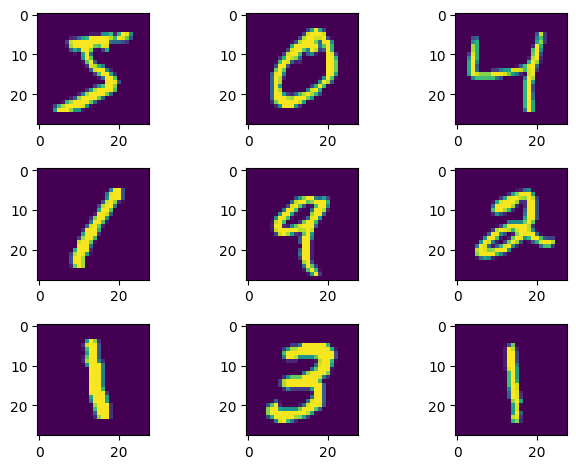

In [108]:
fig,axs=plt.subplots(3,3)
cnt=0
for i in range(3):
  for j in range(3):
    plt.tight_layout()
    axs[i,j].imshow(xtrain[cnt])
    cnt+=1

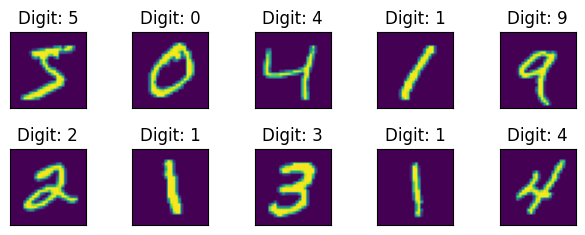

In [109]:
fig = plt.figure(figsize=(6,6))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(xtrain[i])
    plt.title("Digit: {}".format(ytrain[i]))
    plt.xticks([])
    plt.yticks([])

In [110]:
xtrain=xtrain/255
xtest=xtest/255

In [111]:
xtest.shape

(10000, 28, 28)

In [112]:
# xtrain=xtrain.reshape(60000,28,28,1)
# xtest=xtest.reshape(10000,28,28,1)

In [113]:
xtrain.ndim

3

In [114]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
mod=Sequential()

In [115]:
mod.add(Flatten(input_shape=(28,28)))
mod.add(Dense(units=400, activation='relu'))
mod.add(Dense(units=10, activation='softmax'))


In [116]:
mod.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 400)               314000    
                                                                 
 dense_14 (Dense)            (None, 10)                4010      
                                                                 
Total params: 318010 (1.21 MB)
Trainable params: 318010 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
mod.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [119]:
h=mod.fit(xtrain,ytrain,epochs=25,validation_data=(xtest,ytest))

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2114 - accuracy: 0.9373 - val_loss: 0.1185 - val_accuracy: 0.9628
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0853 - accuracy: 0.9736 - val_loss: 0.0857 - val_accuracy: 0.9735
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0561 - accuracy: 0.9823 - val_loss: 0.0673 - val_accuracy: 0.9792
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0678 - val_accuracy: 0.9782
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0620 - val_accuracy: 0.9810
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0676 - val_accuracy: 0.9793
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0727 - val_accuracy:

In [120]:
h.history

{'loss': [0.21139131486415863,
  0.08529873192310333,
  0.0561416819691658,
  0.039488233625888824,
  0.029033342376351357,
  0.022891581058502197,
  0.01680634915828705,
  0.014382353983819485,
  0.01246640644967556,
  0.010824963450431824,
  0.00922276172786951,
  0.00802109856158495,
  0.008817991241812706,
  0.007096424233168364,
  0.007746080402284861,
  0.006214434746652842,
  0.006347775459289551,
  0.00784084852784872,
  0.0025464266072958708,
  0.008520535193383694,
  0.003855000250041485,
  0.00724828103557229,
  0.005080704111605883,
  0.006711460649967194,
  0.003557319287210703],
 'accuracy': [0.9372833371162415,
  0.9735999703407288,
  0.9823166728019714,
  0.9872333407402039,
  0.9905333518981934,
  0.9926666617393494,
  0.9945833086967468,
  0.9949166774749756,
  0.9954833388328552,
  0.9966833591461182,
  0.9971166849136353,
  0.9974333047866821,
  0.9971500039100647,
  0.997783362865448,
  0.9971500039100647,
  0.997866690158844,
  0.9978333115577698,
  0.997399985790

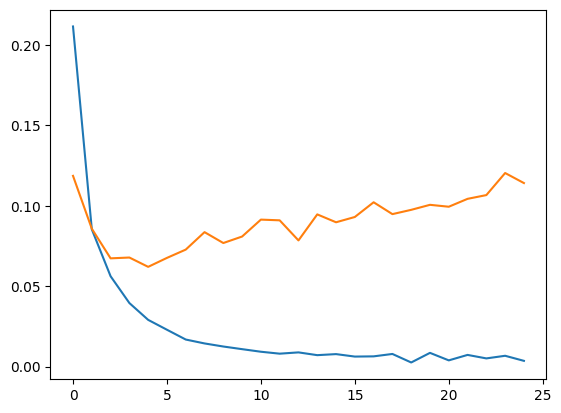

In [121]:
loss=h.history['loss']
val_loss=h.history['val_loss']
epoch=h.epoch
plt.plot(epoch,loss)
plt.plot(epoch,val_loss)

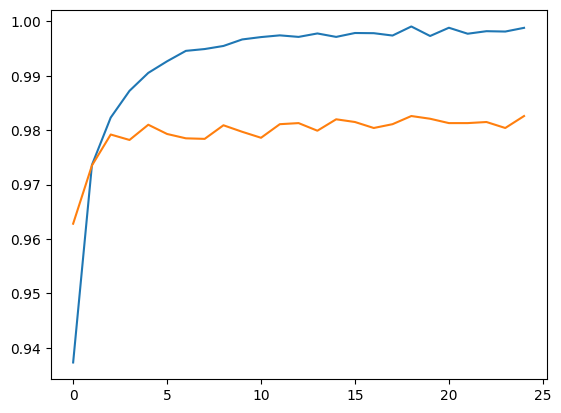

In [122]:
accuracy=h.history['accuracy']
val_accuracy=h.history['val_accuracy']
plt.plot(epoch,accuracy)
plt.plot(epoch,val_accuracy)

In [133]:
p=mod.predict(xtest[:1])
np.argmax(p)

1/1 [==============================] - 0s 17ms/step


7

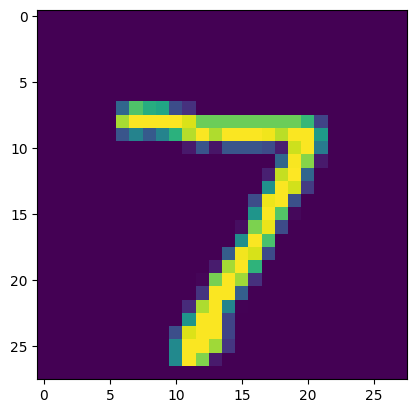

In [139]:
plt.imshow(xtest[0])

In [146]:
xtest

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [188]:
from PIL import Image
img='/content/images.png'
img=Image.open(img)
img=img.resize((28,28))
img=np.array(img)/255
im=np.expand_dims(img,axis=0)
n=mod.predict([im])
output=np.argmax(n)
output


1/1 [==============================] - 0s 29ms/step


7